<img src="images/illu_fr_logobe.jpeg"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>
<!-- <img src="images/illu_fr_logobe.jpeg", width=200, height=200> -->

# ___Liste des bâtiments publics certifiés BXL___

**Catégories de bâtiments :**
1. Services administratifs
2. Crèches
3. Enseignement du jour OU du soir
4. Enseignement du jour ET du soir
5. Enseignement supérieur
6. Hôpitaux
8. Maisons de repos, maisons de revalidation et de soins et services similaires, établissements pénitentiaires
10. Centres sportifs
11. Théatres et centres culturels
12. Musées, bibliothèques, médiathèques et services similaires
13. Ateliers, centres funéraires, dépôts, ...mm

> ***Source : https://www.peb-epb.brussels/pub-frontoffice/pages/anybody.xhtml***
<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) -->
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Create dataframe
folder = 'C:\\Users\\rober\\OneDrive\\5_DATA_ANALYSIS'
file_to_load = 'Liste des bâtiments publics certifiés BXL_RRF201007.xlsx'
path =folder + "\\" + file_to_load
batiments = pd.read_excel('Liste des bâtiments publics certifiés BXL_RRF201007.xlsx')
batiments.head()
batiments['Catégorie'].unique()

array(['3 - Enseignement du jour OU du soir', '2 - Crèches',
       '1 - Services administratifs', '10 - Centres sportifs',
       '11 - Théatres et centres culturels',
       '4 - Enseignement du jour ET du soir',
       '8 - Maisons de repos, maisons de revalidation et de soins et services similaires, établissements pénitentiaires',
       '5 - Enseignement supérieur',
       '12 - Musées, bibliothèques, médiathèques et services similaires',
       '7 - Centres de santé et services similaires',
       '13 - Ateliers, centres funéraires, dépôts, ...', '6 - Hôpitaux',
       '9 - Piscines'], dtype=object)

In [3]:
# Editing and adding columns
batiments['# Catégorie'] = batiments['Catégorie'].str.extract(r'(\d+)\s\-').astype('int')
batiments['Catégorie'] = batiments['Catégorie'].str.replace(r'\d+\s\-\s','')

In [4]:
batiments['Catégorie'].unique()

array(['Enseignement du jour OU du soir', 'Crèches',
       'Services administratifs', 'Centres sportifs',
       'Théatres et centres culturels', 'Enseignement du jour ET du soir',
       'Maisons de repos, maisons de revalidation et de soins et services similaires, établissements pénitentiaires',
       'Enseignement supérieur',
       'Musées, bibliothèques, médiathèques et services similaires',
       'Centres de santé et services similaires',
       'Ateliers, centres funéraires, dépôts, ...', 'Hôpitaux',
       'Piscines'], dtype=object)

In [5]:
batiments.columns

Index(['N° BCE', 'Organisation publique', 'Catégorie', 'Nom du bâtiment',
       'Adresse', 'Indice d’émission de CO2 [kg éq CO2/(m².an)]',
       'Niveau de performance énergétique [kWhEP/(m².an)]', 'Classe',
       '# Catégorie'],
      dtype='object')

In [6]:
# Creating categories for classes
my_categories=pd.CategoricalDtype(categories=['G', 'F','E-','E', 'E+','D-','D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],ordered=True)
batiments['Classe'].astype(my_categories)

0       A
1      A+
2       B
3       B
4       B
       ..
393     G
394     G
395     G
396     G
397     G
Name: Classe, Length: 398, dtype: category
Categories (17, object): ['G' < 'F' < 'E-' < 'E' ... 'B+' < 'A-' < 'A' < 'A+']

In [7]:
batiments.shape #how many rows and how many columns
batiments.info 
batiments.describe()

,Indice d’émission de CO2 [kg éq CO2/(m².an)],Niveau de performance énergétique [kWhEP/(m².an)],# Catégorie
count,398.000000,398.000000,398.000000
mean,43.934648,257.506106,3.967337
std,64.079760,376.258292,3.737810
min,0.180000,-5.840000,1.000000
25%,26.180000,145.947500,1.000000
50%,37.045000,219.420000,3.000000
75%,48.852500,293.597500,5.000000
max,1162.710000,6681.050000,13.000000


In [8]:
# Removing one detected outlier
max_val = batiments['Niveau de performance énergétique [kWhEP/(m².an)]'].max()
max_idx = batiments['Niveau de performance énergétique [kWhEP/(m².an)]'].idxmax(axis=0)
batiments.iloc[max_idx] #0419.700.390
batiments.drop(index=max_idx, inplace=True)

In [9]:
corr = batiments.corr()
corr

,Indice d’émission de CO2 [kg éq CO2/(m².an)],Niveau de performance énergétique [kWhEP/(m².an)],# Catégorie
Indice d’émission de CO2 [kg éq CO2/(m².an)],1.000000,0.997944,0.156066
Niveau de performance énergétique [kWhEP/(m².an)],0.997944,1.000000,0.144030
# Catégorie,0.156066,0.144030,1.000000


In [10]:
np.where(batiments['# Catégorie'].unique())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64),)

<AxesSubplot:xlabel='# Catégorie', ylabel='count'>

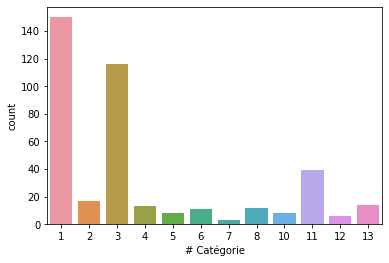

In [11]:
# AMOUNT OF CERTIFIED BUILDINGS PER CATEGORIE
# sns.countplot(x='# Catégorie', hue='Classe' ,data=batiments)
sns.countplot(x='# Catégorie',data=batiments)

<AxesSubplot:xlabel='Classe', ylabel='count'>

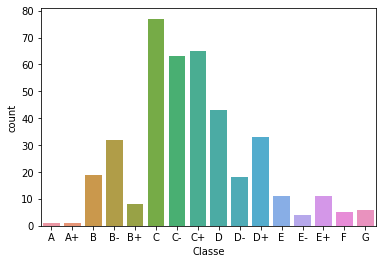

In [12]:
# AMOUNT OF CERTIFIED BUILDINGS PER CLASSE
sns.countplot(x='Classe',data=batiments, order = batiments['Classe'].unique())

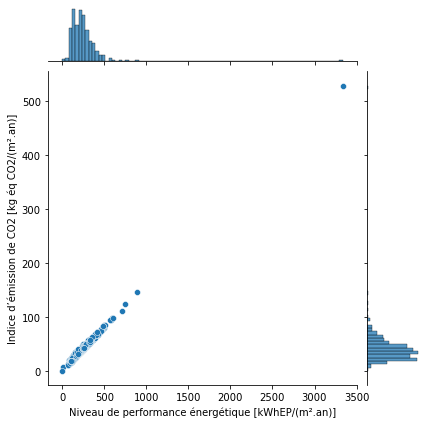

In [13]:
#Histograma de 2 variables
sns.jointplot(x='Niveau de performance énergétique [kWhEP/(m².an)]',y='Indice d’émission de CO2 [kg éq CO2/(m².an)]',data=batiments)#, kind='reg')

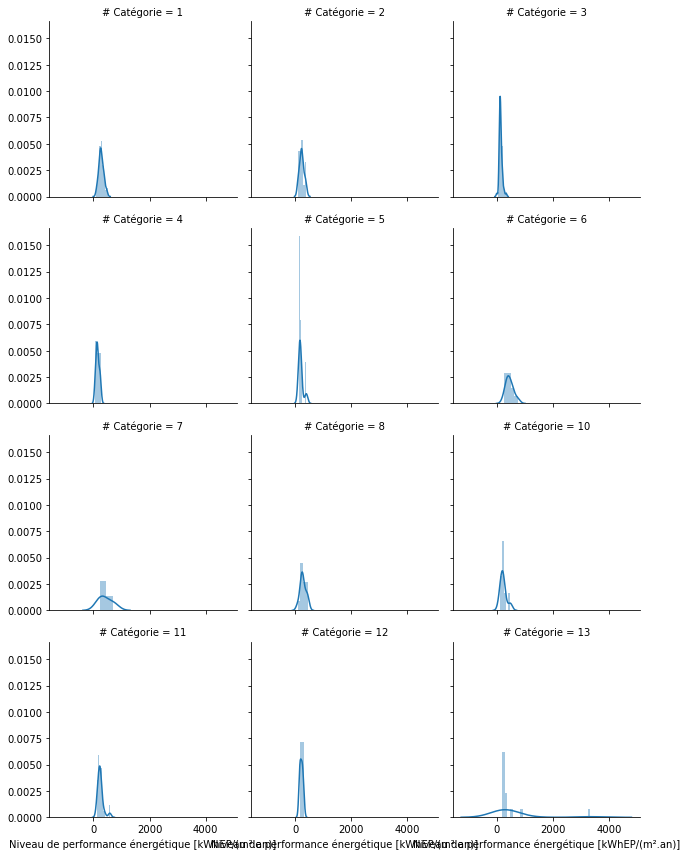

In [14]:
grafico = sns.FacetGrid(data=batiments,col='# Catégorie',col_wrap=3)#,row='smoker')
grafico.map(sns.distplot,'Niveau de performance énergétique [kWhEP/(m².an)]') 

<AxesSubplot:xlabel='# Catégorie', ylabel='Niveau de performance énergétique [kWhEP/(m².an)]'>

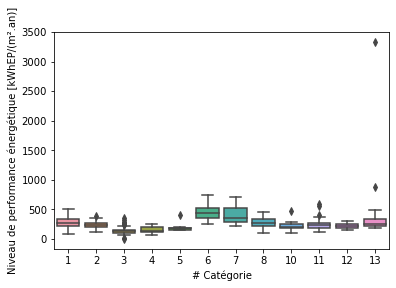

In [15]:
sns.boxplot(x='# Catégorie',y='Niveau de performance énergétique [kWhEP/(m².an)]',data=batiments)#,hue='# Catégorie')

In [16]:
batiments_matrix = batiments.pivot_table(index='Classe',columns='# Catégorie',values='Niveau de performance énergétique [kWhEP/(m².an)]',aggfunc='count').fillna(0)
#batiments_matrix = batiments_matrix.fillna(0)
batiments_matrix.head()

# Catégorie,1,2,3,4,5,6,7,8,10,11,12,13
Classe,,,,,,,,,,,,
A,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A+,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B,8.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
B+,4.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
B-,11.0,1.0,13.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0


<AxesSubplot:xlabel='# Catégorie', ylabel='Classe'>

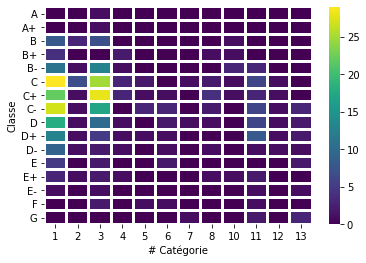

In [17]:
sns.heatmap(batiments_matrix,cmap='viridis',linecolor='white',linewidth=2)  #cmap='viridis' / 'coolwarm' / 'plasma' / 'inferno'